<a href="https://colab.research.google.com/github/hamza998/Indus/blob/master/IMDB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [2]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
import collections

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (value, key) in word_index.items()])

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [0]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [0]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.5048 - acc: 0.7871 - val_loss: 0.3775 - val_acc: 0.8703
Epoch 2/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2991 - acc: 0.9048 - val_loss: 0.3001 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2173 - acc: 0.9284 - val_loss: 0.3082 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1747 - acc: 0.9439 - val_loss: 0.2826 - val_acc: 0.8842
Epoch 5/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1422 - acc: 0.9540 - val_loss: 0.2855 - val_acc: 0.8857
Epoch 6/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1148 - acc: 0.9651 - val_loss: 0.3144 - val_acc: 0.8777
Epoch 7/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.0977 - acc: 0.9707 - val_loss: 0.3131 - 

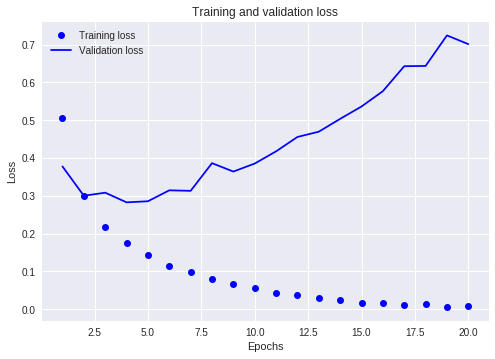

Figure 3.7 Training and validation loss


In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = list(range(1, len(acc) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Figure 3.7 Training and validation loss")

NameError: ignored

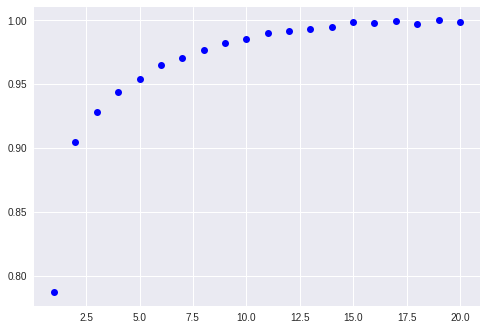

In [17]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.4737 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.2674 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.2034 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 2s 84us/step
